
<div align="center">
  <h1>METODOLOGÍA CRISP-DM</h1>
  <h3>Cross Industry Standard Process for Data Mining</h3>
  <h3>Proceso Estándar de la Industria Cruzada para la Minería de Datos</em></p>
</div>

####     Integrantes:
* Misael Gonzáles Soria
* José Carlos Barreras Maldonado
* Axel Castro Fonseca
* Guillermo Velazquez Coronado


## Cross Industry Standard Process for Data Mining (CRISP-DM):

Es un proceso estructurado o metodología ampliamente utilizada para la realización de proyectos de minería de datos o análisis de datos. Se compone de seis fases principales:

<div align="center">
    <img src="https://github.com/guillermovc/MCD_ICD_WineQuality/assets/90294947/eba4fea1-b953-4eb7-8331-3b816e8fcb9f" alt="Descripción de la imagen">
</div>

<div align="center">
    <em>Figura 1: Metodología CRISP-DM</em>
</div>

<div align="center">
    <em>Plotnikova, V., et al. (2022).</em>
</div>

## 1. Entendimiento del negocio

- Esta primera fase tiene como objetivo comprender los objetivos y requisitos comerciales antes de avanzar en el proceso de análisis de datos. 
- En esta fase se define el alcance del proyecto, los objetivos comerciales, los requisitos y, finalmente,  se produce un plan de proyecto sólido.



### 1.1 Para el caso de estudio: 

**Objetivo**: Predecir la calidad del vino tinto basándose en características fisicoquímicas para ayudar a la toma de decisiones informadas sobre la producción y mejorar la calidad del producto.

**Metas**: Establecer un modelo de predicción de calidad con un alto nivel de precisión.

**Declaración del problema**: Desarrollar un modelo de predicción de calidad de vino basado en características fisicoquímicas.

## 2. Entendimiento de los datos
- Se debe recolectar y explorar los datos relevantes para el proyecto. 
- Esta etapa se centra en adquirir un entendimiento de los datos que se utilizarán en el proyecto.
- Se debe evaluar la calidad de los datos y determinar si son adecuados para el análisis

### 2.1 Recopilación de datos
- Recopilación de la base de datos que contienen información sobre las características fisicoquímicas de los vinos desde https://archive.ics.uci.edu/static/public/186/wine+quality.zip

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import urllib.request
from zipfile import ZipFile
import os
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')

In [3]:
subdir = "./data/"
zip_url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_file = "wine+quality.zip"
white_wine_file = "winequality-white.csv"
red_wine_file = "winequality-red.csv"

In [4]:
# Descarga y Descomprime el ZIP
if not os.path.exists(zip_file):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(zip_url, subdir + zip_file)  
    with ZipFile(subdir + zip_file, "r") as zip_ref:
        zip_ref.extractall(subdir)
    
# Leer el archivo CSV en un DataFrame
df = pd.read_csv(subdir + red_wine_file, sep=";")

In [5]:
# Muestra parcial del DataFrame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.2 Exploración de datos
- Comprensión de la estructura de los conjuntos de datos.
- Verificación de la calidad de los datos. 
- Identificación posibles problemas como valores faltantes o atípicos.


In [6]:
# Estructura de DataFrame
df.shape 

(1599, 12)

In [74]:
# Información de las características del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [75]:
# Resumen de valores faltantes
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2.3 Análisis inicial
- Realización del análisis estadístico.
- Comprensión de las relaciones entre las características fisicoquímicas y la calidad del vino.

In [76]:
# Estadísticas descriptivas del DataFrame

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Conteo de la variable objetivo 'Quality'

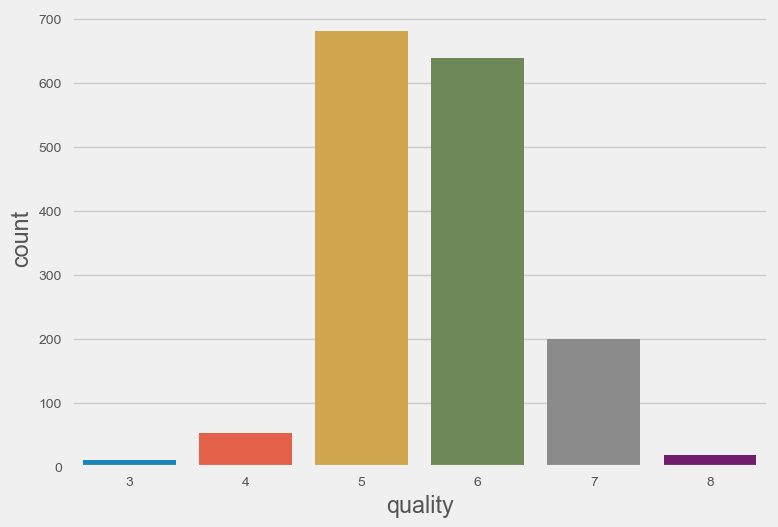

In [116]:
sns.countplot(df, x="quality")
plt.tight_layout()
plt.show()

#### Boxplots de la variable objetivo: quality

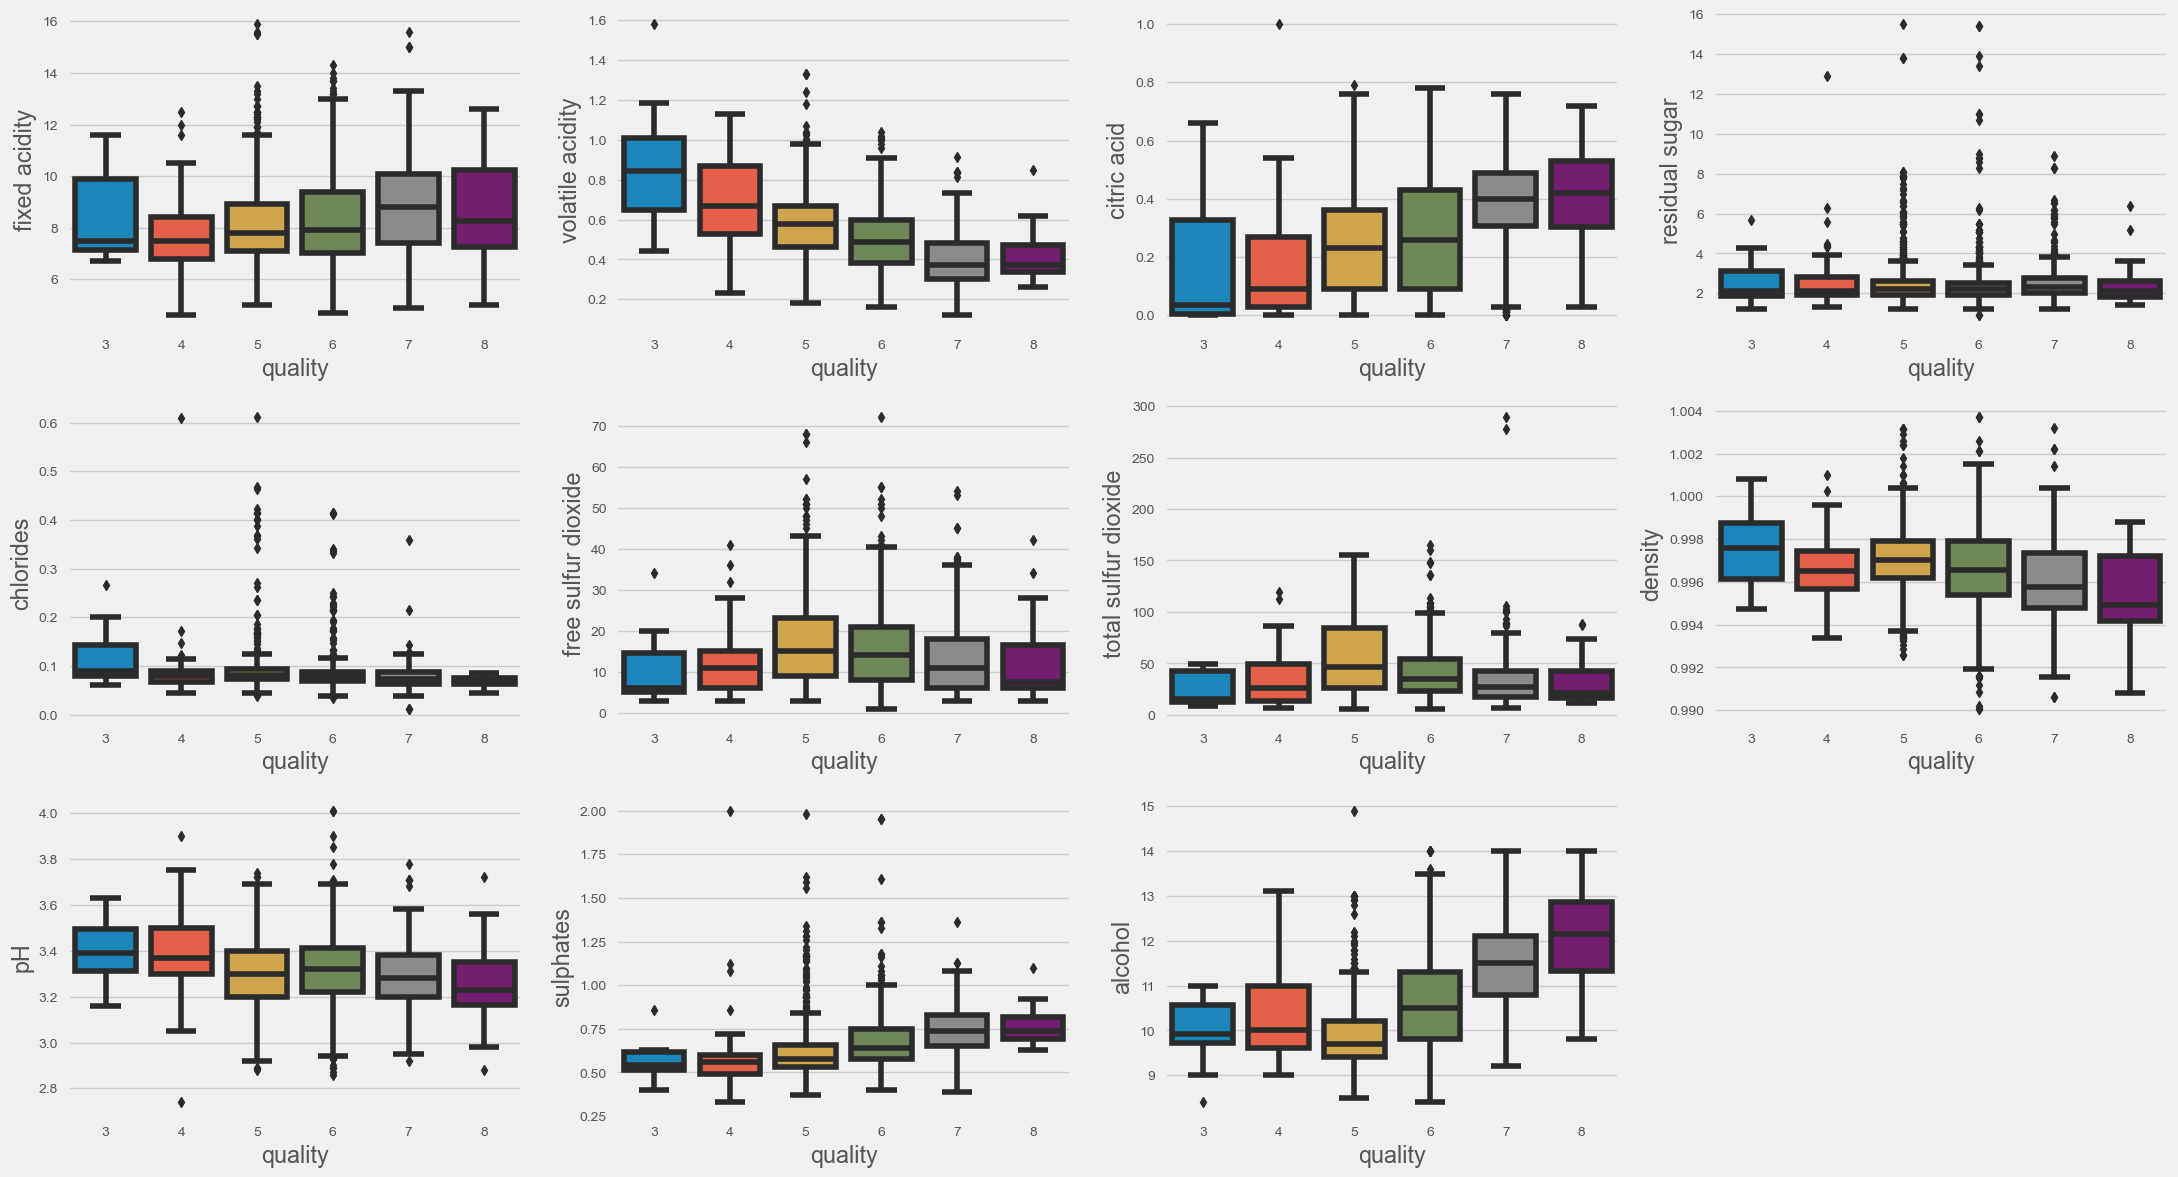

In [101]:
# Creando Sub-Boxplots que relaciona la variable dependiente 'quality' con las variables independientes

plt.figure(figsize=(22, 12))
for i, column in enumerate(df.columns[:-1]):  # Excluye la variable dependiente
    plt.subplot(3, 4, i + 1)  
    sns.boxplot(x=df['quality'], y=df[column])  
plt.tight_layout()
plt.show()

### 2.4 Identificación de relaciones: 
- Identificación de posibles correlaciones o relaciones entre las características fisicoquímicas y la calidad del vino
- Información crucial para seleccionar las características más relevantes en etapas posteriores del proyecto

#### Matriz de correlación con las características originales

<Axes: >

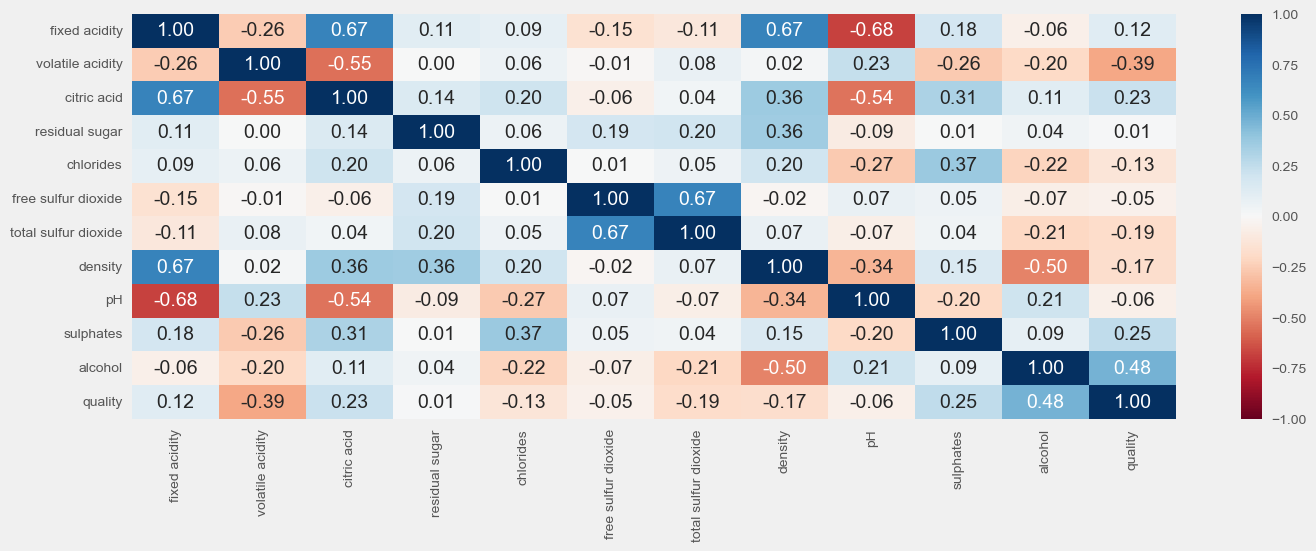

In [111]:
# Heatmap de la matriz de correlación

plt.figure(figsize = (15,5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='RdBu', fmt = '.2f', vmin=-1, vmax=1)

## 3. Preparación de los datos
- En este paso, el principal objetivo es limpiar y preparar los datos.
- creación de atributos adicionales según sea necesario, que se utilizarán para el modelado. 

### 3.1 Limpieza de datos:
- Identificación de posibles relaciones entre las características fisicoquímicas y la calidad del vino
- Información crucial para seleccionar las características más relevantes en etapas posteriores del proyecto

In [76]:
# Valor absoluto de la correlación de las variable independientes con la variable dependiente

quality_corr = corr_matrix.loc["quality"].abs().sort_values().drop("quality")
quality_corr

residual sugar          0.013732
free sulfur dioxide     0.050656
pH                      0.057731
fixed acidity           0.124052
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity        0.390558
alcohol                 0.476166
Name: quality, dtype: float64

#### Se procede a detectar y eliminar las variables poco correlacionadasa la variable dependiente, una correlación < 0.10

In [77]:
# Detección de variables poco relacionadas a la variable dependiente
CORR_THRESH = 0.10 # Una correlación menor se considera muy baja
low_corr_vars = quality_corr[quality_corr < CORR_THRESH]
low_corr_vars

residual sugar         0.013732
free sulfur dioxide    0.050656
pH                     0.057731
Name: quality, dtype: float64

In [78]:
low_corr_names = low_corr_vars.index.tolist()
low_corr_names

['residual sugar', 'free sulfur dioxide', 'pH']

In [79]:
# Creación del DataFrame con las variables independientes de alta correlación
df_trans = df.drop(columns=low_corr_names)
df_trans.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


#### Heatmap de la matriz reducida de alta correlación

<Axes: >

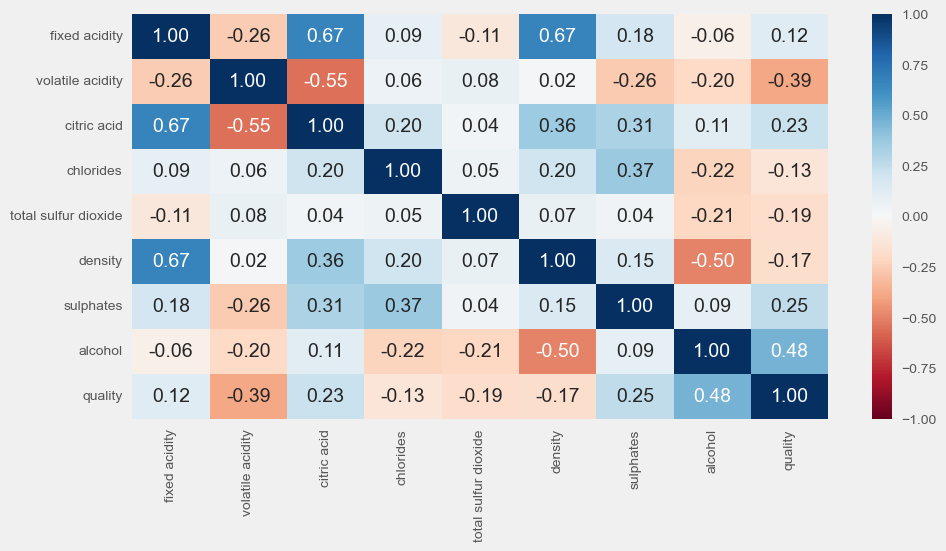

In [80]:
# Heatmap de la matriz de alta correlación

plt.figure(figsize = (10,5))
trans_corr_matrix = df_trans.corr()
sns.heatmap(trans_corr_matrix, annot=True,cmap='RdBu', fmt = '.2f', vmin=-1, vmax=1)

### 3.2 Selección de características:
- Decidir si algunas variables deben ser excluidas del modelo en función de un análisis más profundo de la correlación y la relevancia de las características.

### Eliminación de variables independientes altamente correlacionadas entre sí
Se puede observar que las las variables **fixed acidity**, **citric acid** y **density** muestran una correlación de **0.67**, por lo que es conveniente mantener solo una que represente a las **3** variables. Para este caso es conveniente mantener aquella que tenga una mayor correlación con la variable objetivo **quality**.

In [81]:
high_corr_names = ["fixed acidity", "citric acid", "density"]
trans_quality_corr = (trans_corr_matrix.loc["quality"][high_corr_names].abs().sort_values())
trans_quality_corr

fixed acidity    0.124052
density          0.174919
citric acid      0.226373
Name: quality, dtype: float64

En este caso, mantendremos la variable **citric acid** por tener la correlación más alta con la variable dependiente: **0.2263**

#### De esta manera queda representado el DataFrame 

In [82]:
df_trans2 = df_trans.drop(columns=["fixed acidity", "density"])
df_trans2.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,0.70,0.00,0.076,34.0,0.56,9.4,5
1,0.88,0.00,0.098,67.0,0.68,9.8,5
2,0.76,0.04,0.092,54.0,0.65,9.8,5
3,0.28,0.56,0.075,60.0,0.58,9.8,6
4,0.70,0.00,0.076,34.0,0.56,9.4,5


<Axes: >

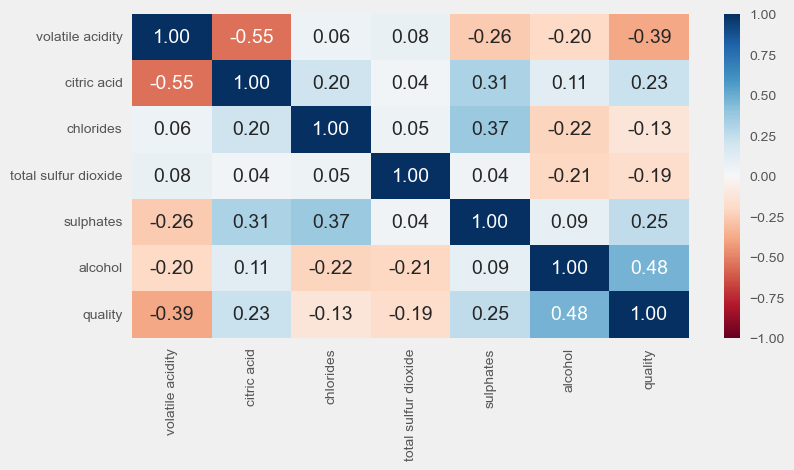

In [115]:
# Heatmap de la Matriz de correlación
plt.figure(figsize = (8,4))
trans2_corr_matrix = df_trans2.corr()
sns.heatmap(trans2_corr_matrix, annot=True,cmap='RdBu', fmt = '.2f', vmin=-1, vmax=1)

### 3.3 Detección de outliers:
- Identificar observaciones que son significativamente diferentes o inusuales en comparación con el resto de los datos.

#### Mediante el método de _Isolation Forest_ de _Sklearn_

In [84]:
X = df_trans2.drop(columns=["quality"])
y = df_trans2["quality"].to_numpy()

In [85]:
clf = IsolationForest(n_estimators=100)
out = clf.fit_predict(X)
print(f"Cantidad de outliers: {abs(out[out==-1].sum())}")

Cantidad de outliers: 192


#### Mediante el método de _Local Outlier Factor_ de _Sklearn_

In [86]:
clf = LocalOutlierFactor(n_neighbors=10)
estimado_LOF = clf.fit_predict(X)
print(f"Cantidad de outliers: {abs(estimado_LOF[estimado_LOF==-1].sum())}")

Cantidad de outliers: 35


In [87]:
df_clean = df_trans2[~(estimado_LOF==-1)]
df_clean2 = df_trans2[~(out==-1)]

#### Comparación de variables antes y despues de la detección de Outlier

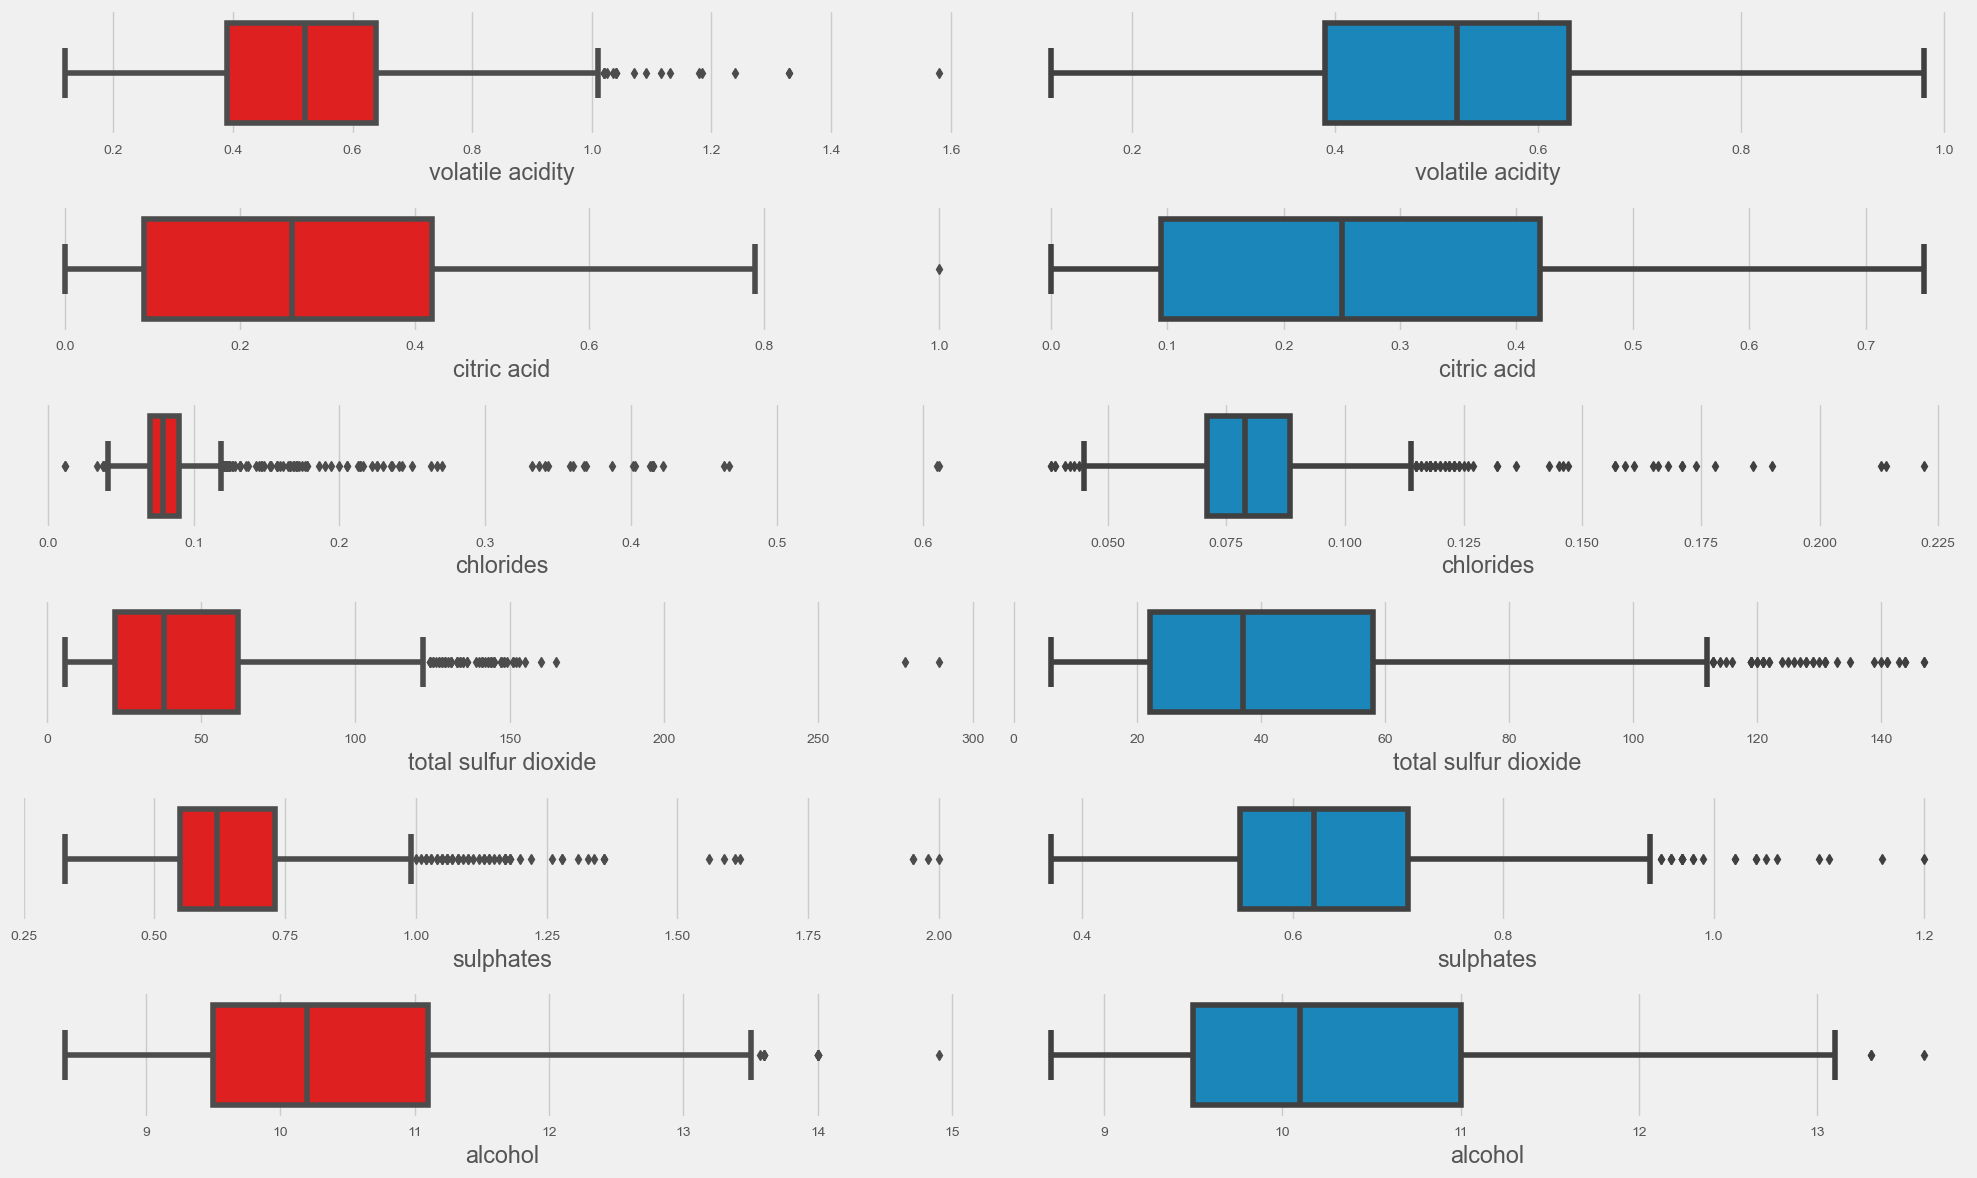

In [114]:
columns_to_compare = df_trans2.columns[:-1]
n_plots = len(columns_to_compare)
fig, axes = plt.subplots(n_plots, 2, figsize=(20, 12))

for i, column in enumerate(columns_to_compare):
    sns.boxplot(x=df_trans2[column], ax=axes[i, 0], color='red')
    sns.boxplot(x=df_clean2[column], ax=axes[i, 1])

plt.tight_layout()
plt.show()

In [89]:
fig = make_subplots(rows=2, cols=3, subplot_titles=df_clean.columns[:-1])

for i, column in enumerate(df_clean.columns[:-1]): 
    row = (i // 3) + 1
    col = (i % 3) + 1
    box_trace = go.Box(x=df_clean['quality'], y=df_clean[column], name=column)
    fig.add_trace(box_trace, row=row, col=col)
    fig.update_xaxes(title_text='Quality', row=row, col=col)

fig.update_layout(
    showlegend=False,
    height=600,
    width=800 
)
fig.show()

### 3.4 Transformación de datos:

- Transformaciones en los datos, como normalización o estandarización de las características fisicoquímicas para asegurarse de que tengan la misma escala.

## 4. Modelado

## 5. Evaluación

## 6. Implementación